<a href="https://colab.research.google.com/github/HanifRafandi014/3D_Machine_Learning/blob/main/ML_Pertemuan-9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 1 Pertemuan 9 Machine Laerning

Nama Anggota :

1. Afdhol Affanuddin 2141720253 / 01
2. Brilliyand Noval Herdana Putra / 2141720104 / 12
3. Hanif Naufal Rafandi / 2141720127 / 14

Kelas : 3D

# **Praktikum 1 Klasifikasi Iris dengan Perceptron**

1. **Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2. **Load Data dan Visualisasi**

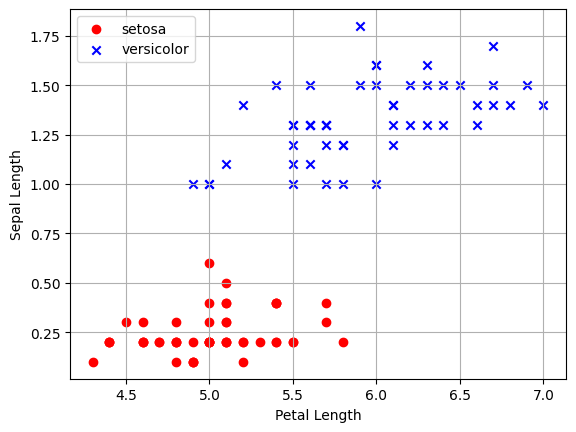

In [3]:
df = pd.read_csv('/content/drive/MyDrive/File Machine Learning/iris(1).csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

3. **Membuat Kelas Perceptron**

In [4]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

4. **Pilih Data dan Encoding Label**

In [5]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

5. **Fitting Model**

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

6. **Visualisasi Nilai Error Per Epoch**

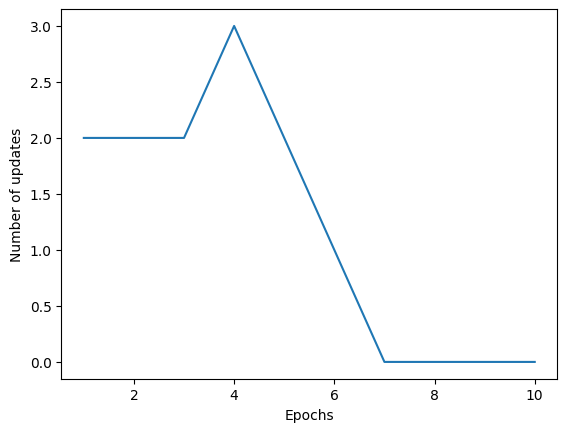

In [7]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

7. **Visualiasasi Decision Boundary**

<ipython-input-8-d7f314ba4772>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


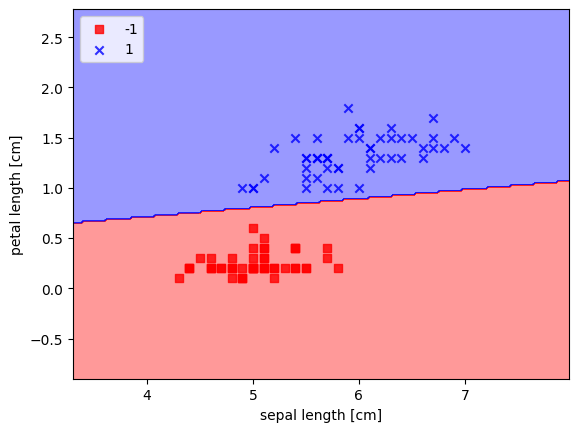

In [8]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# **Praktikum 2 Klasifikasi Berita dengan Perceptron**

1. **Import Library**

In [9]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

2. **Pilih Label dan Split Data**

In [10]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

3. **Ekstrak Fitur dan Buat Model Perceptron**

In [11]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**Penjelasan**

Kode program di atas menggunakan dataset 20newsgroup, yang terdiri dari sekitar 20.000 dokumen. Scikit-learn menyediakan fungsi yang memudahkan unduhan dan pembacaan dataset menggunakan sklearn.datasets. Kode tersebut menggunakan Perceptron untuk melakukan klasifikasi multi-kelas. Strategi yang digunakan adalah one-versus-all, di mana pelatihan dilakukan untuk setiap kelas dalam data pelatihan. Dalam konteks dokumen teks, salah satu langkah yang diperlukan adalah ekstraksi fitur, dan salah satu pendekatan yang digunakan adalah penghitungan bobot TF-IDF. Pada kode program tersebut, digunakan TfidfVectorizer untuk melakukan ekstraksi fitur berdasarkan TF-IDF.

# **Praktikum 3 Nilai Logika XOR dengan MLP**

1. **Import Library**

In [12]:
from sklearn.neural_network import MLPClassifier

2. **Buat Data**

In [13]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

3. **Fit Model**

In [14]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

4. **Prediksi**

In [15]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# **Praktikum 4 Klasifikasi dengan ANN**

# **Pra Pengolahan Data**

1. **Import Library**

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf

2. **Load Data**

In [17]:
dataset = pd.read_csv('/content/drive/MyDrive/File Machine Learning/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

# Cek data
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


3. **Encoding Data Kategorikal**

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

4. **Encoding Kolom "Geography" dengan One Hot Encoder**

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

5. **Split Data**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

6. **Scaling Fitur**

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Membuat Model ANN**

1. **Inisiasi Model ANN**

In [22]:
ann = tf.keras.models.Sequential()

2. **Membuat Input Layer dan Hidden Layer Pertama**

In [23]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

3. **Membuat Hidden Layer Kedua**

In [24]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

4. **Membuat Output Layer**

In [25]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# **Training Model**

1. **Compile Model (Menyatukan Arsitektur) ANN**

In [26]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2. **Fitting Model**

In [27]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 5s 5ms/step - loss: 0.5950 - accuracy: 0.7466
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4925 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4613 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4449 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4359 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4257 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4222 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4185 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4153 - accura

# **Membuat Prediksi**

Diberikan informasi sebagai berikut,
* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: $ 60000
* Number of Products: 2
* Does this customer have a credit card ? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: $ 50000

1. **Modelkan Data Baru dan Buat Prediksi**

In [28]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 107ms/step
[[False]]


2. **Prediksi Dengan Data Testing**

In [29]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


3. **Cek Akurasi dan Confusion Matrix**

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1510   85]
 [ 193  212]]


0.861

# **Tugas Pertemuan 9**

* Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
* Anda diperbolehkan melakukan eksplorasi terhadap,
  * Metode pra pengolahan
  * Pemilihan fitur
  * Arsitektur ANN
  * Fungsi Aktiviasi
* ANN diimplementasikan dengan menggunakan tensorflow.
* DIKERJAKAN SECARA BERKELOMPOK
* JELASKAN HASIL YANG ANDA DAPATKAN,
  * AKURASI
  * CONFUSION MATRIX
  * KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

1. **Import Library**

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from subprocess import check_output
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

2. **Pra-pengolahan data MNIST**

In [40]:
# Pra-pengolahan data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # load data MNIST dan split data

# ubah bentuk fitur menjadi vektor dan dinormalisasi
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

In [42]:
#import dataset
from keras.datasets import mnist
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


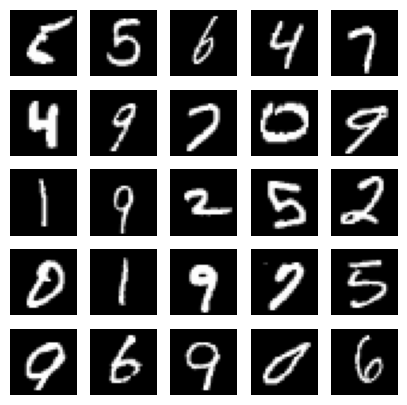

In [43]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

3. **Buat Arsitektur ANN**

In [46]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [49]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [50]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [51]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

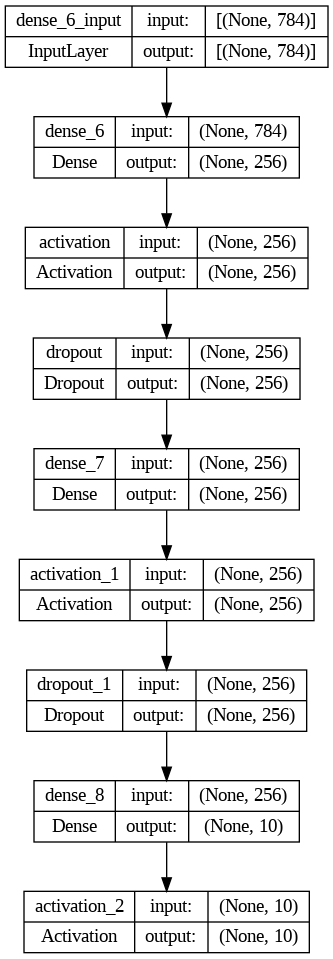

In [52]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

4. **Implementasi MLP Model dengan Keras**

In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.4239 - accuracy: 0.8697
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1954 - accuracy: 0.9420
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1509 - accuracy: 0.9552
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1313 - accuracy: 0.9603
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1127 - accuracy: 0.9650
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1045 - accuracy: 0.9679
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0953 - accuracy: 0.9708
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0892 - accuracy: 0.9719
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0820 - accuracy: 0.9736
Epoch 10/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0785 - accuracy: 0.

5. **Evaluasi Performa**

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prediksi hasil dari data pengujian
y_pred = model.predict(x_test)

# Mengonversi prediksi ke bilangan bulat
y_pred = np.argmax(y_pred, axis=1)

# Mengonversi label kelas ke bilangan bulat
y_test = np.argmax(y_test, axis=1)

# Membuat matriks kebingungan
labels = np.unique(y_test)
confusion = confusion_matrix(y_test, y_pred, labels=labels)

print("Confusion Matrix:")
print(confusion)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix:
[[ 974    1    1    0    0    1    1    1    1    0]
 [   1 1128    0    2    0    0    2    0    2    0]
 [   3    0 1018    3    1    0    1    5    1    0]
 [   1    0    2  990    0    5    0    6    2    4]
 [   1    0    6    0  957    0    4    3    1   10]
 [   3    0    0   11    1  871    1    1    2    2]
 [   3    2    0    1    1    3  948    0    0    0]
 [   2    2    6    1    0    0    0 1012    2    3]
 [   7    0    4    3    3    7    2    5  938    5]
 [   1    2    1    3    8    2    0    2    1  989]]
Accuracy: 0.9825


6. **Implementasi ANN dengan Tensorflow**

**Import Library**

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')
#cuda 12.1 not recognized by tf :(
%matplotlib inline
# print(tensorflow.__version__)

**Menyiapkan Data MNIST dan Melakukan Splitting**

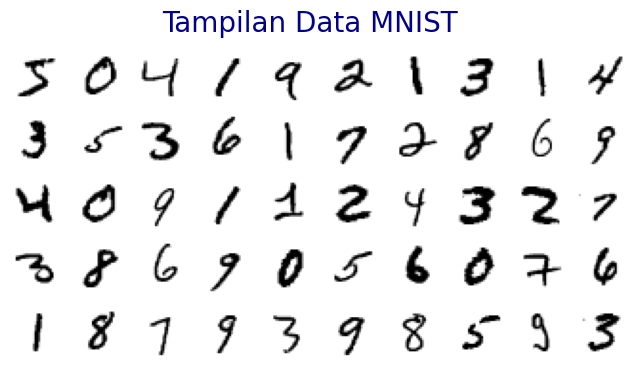

In [70]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Menampilkan gambar dari data MNIST
fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Tampilan Data MNIST\n", size=20, color="darkblue")
plt.show()

**Menampilkan informasi dataset MNIST**

In [71]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


**Reshape dan Normalisasi Data**

In [72]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


**Membuat Pemodelan ANN**

In [73]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

In [74]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)

In [75]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Melakukan Pelatihan dan Pengujian Dataset**

In [76]:
history = nn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5159 - accuracy: 0.8442
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3265 - accuracy: 0.9034
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2803 - accuracy: 0.9162
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2539 - accuracy: 0.9225
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2388 - accuracy: 0.9281
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2282 - accuracy: 0.9302
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2216 - accuracy: 0.9316
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2118 - accuracy: 0.9349
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2078 - accuracy: 0.9359
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.202

**Membuat Visualisasi dan Evaluasi**

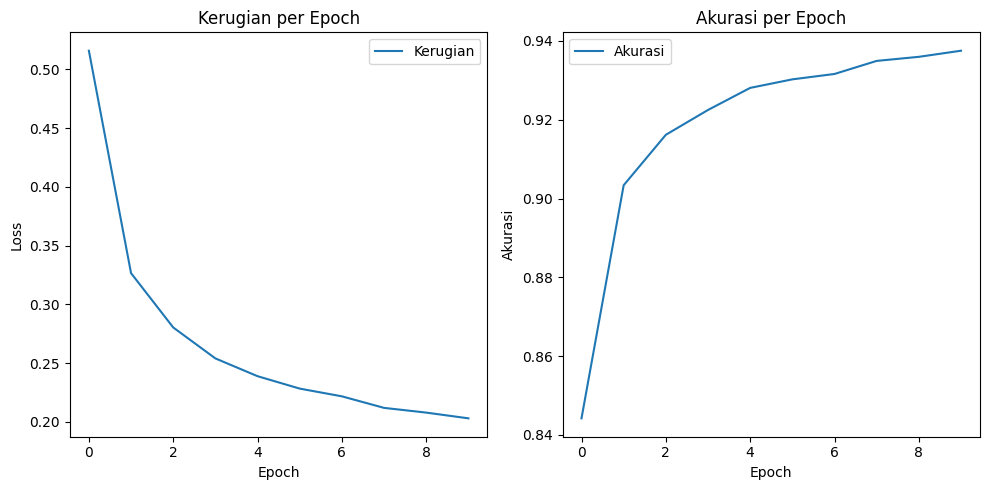

In [83]:
# Visualisasi loss (kerugian)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Kerugian')
plt.title('Kerugian per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

**Membuat Confusion Matriks**

In [87]:
# Define the number of classes in your classification problem
num_classes = 10  # Replace 10 with the actual number of classes

# Check the shape of y_test and y_prob
print("Shape of y_test:", y_test.shape)
print("Shape of y_prob:", y_prob.shape)

# Convert y_test to one-hot encoded format
from keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=num_classes)

# Calculate accuracy
y_pred = y_prob.argmax(axis=1)
y_test = y_test.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Shape of y_test: (10000,)
Shape of y_prob: (10000, 10)
Accuracy: 0.9627


In [88]:
# Menghitung confusion matrix berdasarkan label sebenarnya (y_test) dan label prediksi (y_pred)
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 957,    0,    1,    1,    1,    4,    8,    2,    5,    1],
       [   0, 1117,    5,    1,    1,    0,    2,    0,    9,    0],
       [   4,    2,  992,    8,    3,    1,    4,    6,   12,    0],
       [   0,    1,    8,  967,    0,   17,    0,    6,    8,    3],
       [   1,    0,    4,    0,  938,    0,    7,    1,    3,   28],
       [   2,    2,    0,   10,    2,  854,    9,    3,    7,    3],
       [   9,    3,    1,    1,    4,    7,  929,    0,    4,    0],
       [   2,    6,   13,    8,    2,    1,    0,  982,    1,   13],
       [   3,    2,    4,    9,    4,    8,    7,    7,  929,    1],
       [   2,    4,    0,    9,   11,    8,    1,    6,    6,  962]])

<Axes: >

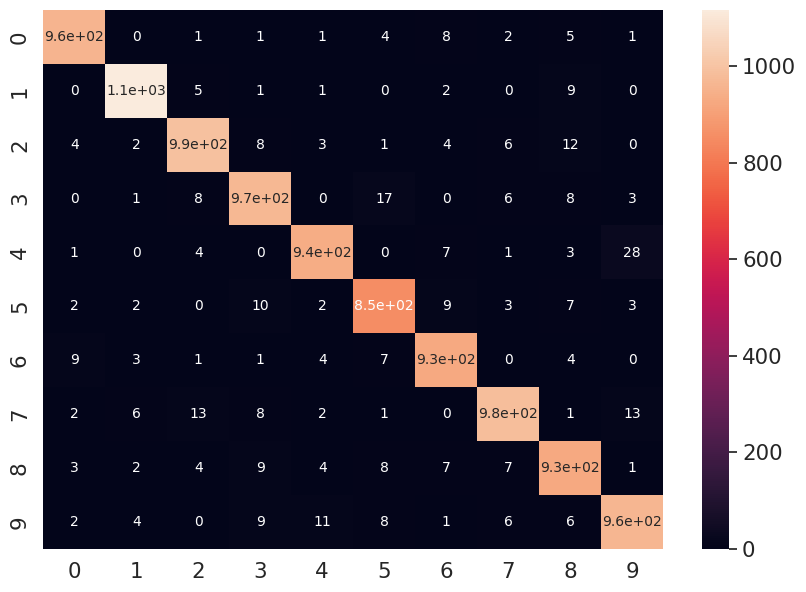

In [89]:
# Membuat visualisasi Confusion Matrix
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

**Kesimpulan :**

1. Pra-pengolahan data
- Data MNIST dimuat dan dibagi menjadi data pelatihan(x_train, y_train) dan data uji (x_test, y_test).
-Fitur dari gambar-gambar MNIST ddiubah menjadi vektor dan dinormalisasi ke dalam rentang [0,1].

2. Arsitektur Model Jaringan Neural (ANN)
- Model ANN terdiri dari 3 lapisan dense (lapisan perseptron) dengan fungsi aktivasi ReLU
- Lapisan pertama memiliki 256 neuron, lapisan kedua memiliki 128 neuron, dan lapisan terakhir memiliki 10 neuron untuk output.

3. Fungsi Aktivasi dan Pelatihan Model
- Model di-compile dengan menggunakan optimizer Adam, loss function Sparse Categorical Crossentropy, dan metrik akurasi.
- Model dilatih pada data pelatihan dengan batch size 32 dan dilakukan selama 5 epoch.

4. Evaluasi Model
- Setelah pelatihan, model dievaluasi pada data uji untuk mengukur akurasi prediksi pada data yang belum pernah dilihat sebelumnya.

5.  Confusion Matrix
- Confusion matrix dihitung dengan menggunakan data uji dan hasil prediksi model. confusion matrix memberikan informasi tentang seberapa baik model mengklasifikasikan data pada setiap kategori.